In [5]:
# Langkah 1: Instalasi library yang dibutuhkan untuk Gemini
!pip install -q langchain-google-genai pandas matplotlib seaborn

In [13]:
import google.generativeai as genai
import os
from google.colab import userdata

# Pastikan API key Anda sudah di-set
try:
    gemini_key = userdata.get('GOOGLE_API_KEY')
    os.environ["GOOGLE_API_KEY"] = gemini_key
    genai.configure(api_key=gemini_key)

    print("Model yang mendukung 'generateContent':")
    for model in genai.list_models():
      # Memeriksa apakah metode 'generateContent' didukung oleh model
      if 'generateContent' in model.supported_generation_methods:
        print(f"- {model.name}")

except Exception as e:
    print(f"🔴 Gagal memuat API Key atau menampilkan model. Error: {e}")

Model yang mendukung 'generateContent':
- models/gemini-1.5-pro-latest
- models/gemini-1.5-pro-002
- models/gemini-1.5-pro
- models/gemini-1.5-flash-latest
- models/gemini-1.5-flash
- models/gemini-1.5-flash-002
- models/gemini-1.5-flash-8b
- models/gemini-1.5-flash-8b-001
- models/gemini-1.5-flash-8b-latest
- models/gemini-2.5-pro-preview-03-25
- models/gemini-2.5-flash-preview-05-20
- models/gemini-2.5-flash
- models/gemini-2.5-flash-lite-preview-06-17
- models/gemini-2.5-pro-preview-05-06
- models/gemini-2.5-pro-preview-06-05
- models/gemini-2.5-pro
- models/gemini-2.0-flash-exp
- models/gemini-2.0-flash
- models/gemini-2.0-flash-001
- models/gemini-2.0-flash-exp-image-generation
- models/gemini-2.0-flash-lite-001
- models/gemini-2.0-flash-lite
- models/gemini-2.0-flash-preview-image-generation
- models/gemini-2.0-flash-lite-preview-02-05
- models/gemini-2.0-flash-lite-preview
- models/gemini-2.0-pro-exp
- models/gemini-2.0-pro-exp-02-05
- models/gemini-exp-1206
- models/gemini-2.0-

In [14]:
# Mengasumsikan file 'reviews.csv' sudah ada
print("Membaca data dari reviews.csv...")
df = pd.read_csv('reviews.csv')

# Menampilkan seluruh isi DataFrame
print("Menampilkan semua data yang berhasil dimuat:")
print(df)

Membaca data dari reviews.csv...
Menampilkan semua data yang berhasil dimuat:
                                          review_text
0   Oh dear Shingeki no Kyojin, where do I even be...
1   Attack on Titan is a particularly unique case ...
2   So what on earth? What have I done? How am I n...
3   There’s a current trend that favors dark and e...
4   Let's get straight to it! Shingeki no Kyojin i...
5   This anime made my mouth open wide for longer ...
6   It's nice to have an anime this popular that i...
7   The hype of 2013 leading to an ending that clo...
8   Shingeki no Kyojin is an amazingly written sto...
9   Shingeki no Kyojin, the anime that has brought...
10  The fact that so many bloggers still name Shin...
11  Well, I'll admit that it's been a while since ...
12  Animation? Great quality. Premise? Interesting...
13  So, Shingeki no Kyojin was like the most hyped...
14  an overrated, snoozefest at best. Many of my f...
15  This show is honestly the most overrated garba...
16  

In [24]:
# Langkah 4: Setup Model Gemini dan Fungsi Analisis Sentimen
# Inisialisasi model dari Google (Gemini)
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-lite", temperature=0)

def analyze_sentiment_gemini(review_text):
    """
    Fungsi untuk menganalisis sentimen menggunakan Gemini.
    Mengembalikan 'Positive', 'Negative', atau 'Mixed'.
    """
    prompt = f"""
    Classify the following review as Positive, Negative, or Mixed.
    Only return one word for the classification.

    Review: "{review_text}"
    Classification:
    """
    try:
        # Memanggil model Gemini
        response = llm.invoke(prompt)
        # Hasil dari LangChain-Google adalah objek, ambil kontennya dengan .content
        cleaned_response = response.content.strip().capitalize()

        # Logika parsing tetap sama
        if "Positive" in cleaned_response:
            return "Positive"
        elif "Negative" in cleaned_response:
            return "Negative"
        elif "Mixed" in cleaned_response:
            return "Mixed"
        else:
            return "Unknown" # Fallback jika respons tidak terduga
    except Exception as e:
        print(f"Error analyzing review: {e}")
        return "Error"

In [25]:
#Langkah 5: Melakukan Analisis Sentimen (Hanya mengubah nama fungsi)
print("\nMemulai analisis sentimen dengan Gemini...")
from tqdm.auto import tqdm
tqdm.pandas()

# Pastikan kolom 'review_text' ada di DataFrame Anda
if 'review_text' in df.columns:
    df['sentiment'] = df['review_text'].progress_apply(analyze_sentiment_gemini)
    print("\nAnalisis sentimen selesai. Hasilnya:")
    print(df)
print(df)
print("\n" + "="*40 + "\n")


Memulai analisis sentimen dengan Gemini...


  0%|          | 0/21 [00:00<?, ?it/s]


Analisis sentimen selesai. Hasilnya:
                                          review_text sentiment
0   Oh dear Shingeki no Kyojin, where do I even be...  Positive
1   Attack on Titan is a particularly unique case ...     Mixed
2   So what on earth? What have I done? How am I n...  Negative
3   There’s a current trend that favors dark and e...  Positive
4   Let's get straight to it! Shingeki no Kyojin i...  Positive
5   This anime made my mouth open wide for longer ...  Positive
6   It's nice to have an anime this popular that i...     Mixed
7   The hype of 2013 leading to an ending that clo...     Mixed
8   Shingeki no Kyojin is an amazingly written sto...  Positive
9   Shingeki no Kyojin, the anime that has brought...     Mixed
10  The fact that so many bloggers still name Shin...  Negative
11  Well, I'll admit that it's been a while since ...  Negative
12  Animation? Great quality. Premise? Interesting...  Negative
13  So, Shingeki no Kyojin was like the most hyped...  Negative
14

In [20]:
nama_file_hasil = 'hasil_analisis_sentimen.csv'
df.to_csv(nama_file_hasil, index=False)

print(f"\n✅ Data hasil analisis telah berhasil disimpan ke file '{nama_file_hasil}'")


✅ Data hasil analisis telah berhasil disimpan ke file 'hasil_analisis_sentimen.csv'


Membuat visualisasi hasil analisis sentimen...


/tmp/ipython-input-2513801966.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


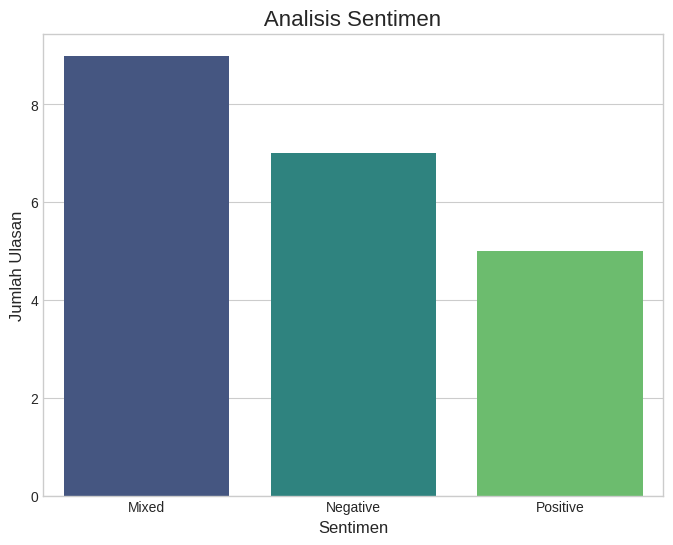

In [23]:
# Langkah 6: Visualisasi Hasil Analisis Sentimen
print("Membuat visualisasi hasil analisis sentimen...")

# Menghitung jumlah setiap kategori sentimen
sentiment_counts = df['sentiment'].value_counts()

# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya plot
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 6))

# Membuat bar plot
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Menambahkan judul dan label
plt.title(' Analisis Sentimen ', fontsize=16)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.xticks(rotation=0) # Agar label x-axis tidak miring

# Menampilkan plot
plt.show()